In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from wordcloud import STOPWORDS

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from scr.models.embeddings import read_glove_embeddings, create_embeddings_matrix, build_embeddings
from scr.models.models import build_NN, build_DistilBert, train_model
from scr.models.metrics import performance_history

Using TensorFlow backend


In [3]:
def preprocessing(text:pd.Series, tokenizer, len:int=32):
    text = text.map(word_tokenize).to_list()
    sequences = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(sequences, maxlen=len, truncating='post', padding='post')
    return text_pad

In [4]:

def cm_plot(y_true, y_pred):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(5, 3))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax[0], colorbar=False)
    ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        normalize="true",
        values_format=".2f",
        ax=ax[1],
        im_kw={"vmin": 0, "vmax": 1},
        colorbar=False,
    )
    fig.suptitle("Confusion Matrix")
    ax[0].set_title("Counts")
    ax[1].set_title("Proportions")
    ax[1].set_ylabel(None)
    #plt.savefig("../figures/40.binary_confusion_matrix.png")

In [5]:
raw = pd.read_csv("./data/raw/train.csv")

clean = pd.read_csv("./data/clean/train.csv")
clean = clean.dropna()

X= clean["text"]
y = clean["target"].values

MAX_LEN=32
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_pad = preprocessing(X_train, tokenizer, MAX_LEN)
X_val_pad = preprocessing(X_val, tokenizer, MAX_LEN)

In [6]:
trained_model = {}

DistilBert

Epoch 1/2
127/127 [==============================] - 275s 2s/step - loss: 0.5362 - accuracy: 0.7566 - val_loss: 0.4317 - val_accuracy: 0.8209
Epoch 2/2
127/127 [==============================] - 342s 3s/step - loss: 0.4047 - accuracy: 0.8310 - val_loss: 0.4156 - val_accuracy: 0.8297


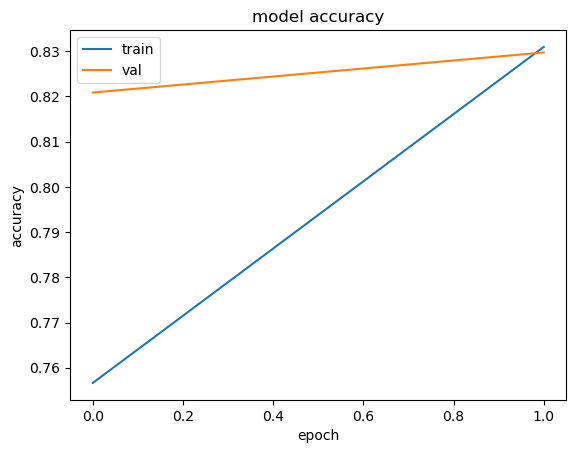

32/32 [==============================] - 22s 659ms/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       580
           1       0.87      0.71      0.78       436

    accuracy                           0.83      1016
   macro avg       0.84      0.81      0.82      1016
weighted avg       0.83      0.83      0.83      1016



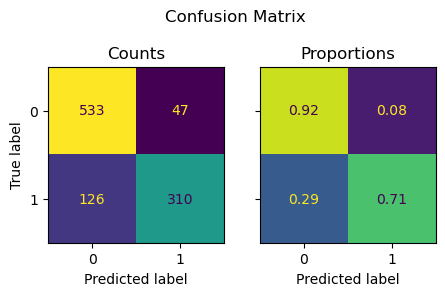

In [7]:
model = build_DistilBert()
model, history = train_model(model, X_train, y_train, X_val, y_val, epoch=2, batch_size=32)
trained_model["distilBert"] = model
performance_history(history, name="DistilBert", directory_path="../figures/")
    
y_pred = model.predict(X_val)
y_pred = y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_val, y_pred))

cm_plot(y_val, y_pred)
plt.savefig("./figures/distilBert.confusion_matrix.png")
plt.show()

In [8]:
glove_embeddings_dict = read_glove_embeddings("./models/embeddings/glove.6B/glove.6B.100d.txt")
embeddings_matrix = create_embeddings_matrix(tokenizer, glove_embeddings_dict, 100)
embeddings_layer = build_embeddings(embeddings_matrix, 32)

Load Glove Embeddings: 400000it [00:06, 63787.64it/s]


Number of unique words: 12440


100%|██████████| 12440/12440 [00:00<00:00, 643685.44it/s]


====== LSTM ======
Epoch 1/100
16/16 [==============================] - 2s 65ms/step - loss: 0.6929 - accuracy: 0.5477 - val_loss: 0.6928 - val_accuracy: 0.5541
Epoch 2/100
16/16 [==============================] - 1s 44ms/step - loss: 0.6926 - accuracy: 0.5854 - val_loss: 0.6924 - val_accuracy: 0.5630
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 0.6922 - accuracy: 0.5864 - val_loss: 0.6921 - val_accuracy: 0.5679
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.6919 - accuracy: 0.5775 - val_loss: 0.6916 - val_accuracy: 0.5679
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 0.6915 - accuracy: 0.5768 - val_loss: 0.6913 - val_accuracy: 0.5719
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 0.6910 - accuracy: 0.5755 - val_loss: 0.6908 - val_accuracy: 0.5738
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 0.6907 - accuracy: 0.5738 - val_loss: 0.6903 - val_accu

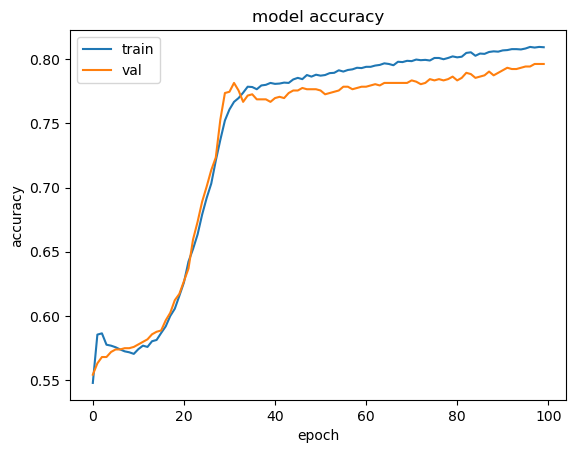

32/32 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       580
           1       0.78      0.73      0.76       436

    accuracy                           0.80      1016
   macro avg       0.79      0.79      0.79      1016
weighted avg       0.80      0.80      0.80      1016



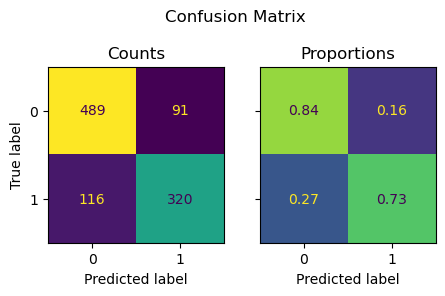

====== GRU ======
Epoch 1/100
16/16 [==============================] - 2s 71ms/step - loss: 0.6930 - accuracy: 0.5655 - val_loss: 0.6929 - val_accuracy: 0.5709
Epoch 2/100
16/16 [==============================] - 1s 47ms/step - loss: 0.6928 - accuracy: 0.5669 - val_loss: 0.6926 - val_accuracy: 0.5709
Epoch 3/100
16/16 [==============================] - 1s 48ms/step - loss: 0.6925 - accuracy: 0.5667 - val_loss: 0.6923 - val_accuracy: 0.5709
Epoch 4/100
16/16 [==============================] - 1s 50ms/step - loss: 0.6923 - accuracy: 0.5669 - val_loss: 0.6920 - val_accuracy: 0.5709
Epoch 5/100
16/16 [==============================] - 1s 52ms/step - loss: 0.6920 - accuracy: 0.5669 - val_loss: 0.6918 - val_accuracy: 0.5709
Epoch 6/100
16/16 [==============================] - 1s 47ms/step - loss: 0.6917 - accuracy: 0.5669 - val_loss: 0.6915 - val_accuracy: 0.5709
Epoch 7/100
16/16 [==============================] - 1s 49ms/step - loss: 0.6915 - accuracy: 0.5669 - val_loss: 0.6912 - val_accur

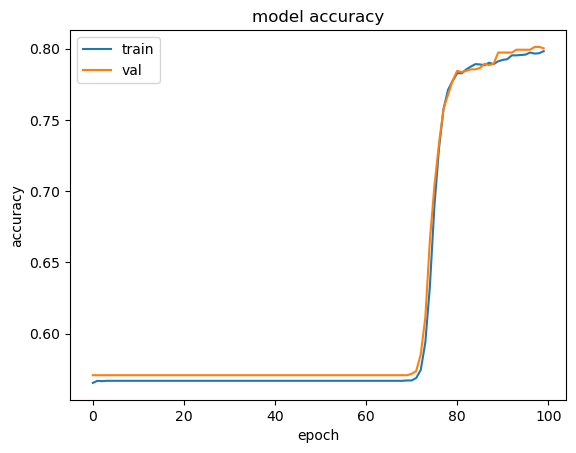

32/32 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       580
           1       0.78      0.74      0.76       436

    accuracy                           0.80      1016
   macro avg       0.80      0.79      0.79      1016
weighted avg       0.80      0.80      0.80      1016



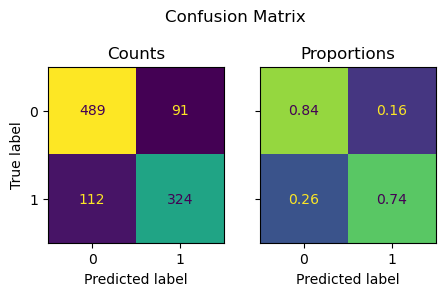

====== RNN ======
Epoch 1/100
16/16 [==============================] - 1s 37ms/step - loss: 0.7311 - accuracy: 0.4417 - val_loss: 0.7253 - val_accuracy: 0.4035
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7278 - accuracy: 0.4518 - val_loss: 0.7219 - val_accuracy: 0.4144
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 0.7279 - accuracy: 0.4469 - val_loss: 0.7189 - val_accuracy: 0.4222
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7235 - accuracy: 0.4577 - val_loss: 0.7164 - val_accuracy: 0.4222
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7175 - accuracy: 0.4641 - val_loss: 0.7140 - val_accuracy: 0.4321
Epoch 6/100
16/16 [==============================] - 0s 26ms/step - loss: 0.7154 - accuracy: 0.4771 - val_loss: 0.7120 - val_accuracy: 0.4291
Epoch 7/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7172 - accuracy: 0.4614 - val_loss: 0.7100 - val_accur

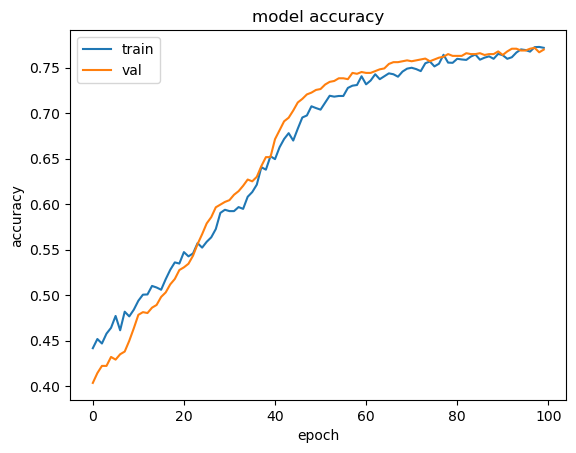

32/32 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       580
           1       0.76      0.67      0.71       436

    accuracy                           0.77      1016
   macro avg       0.77      0.76      0.76      1016
weighted avg       0.77      0.77      0.77      1016



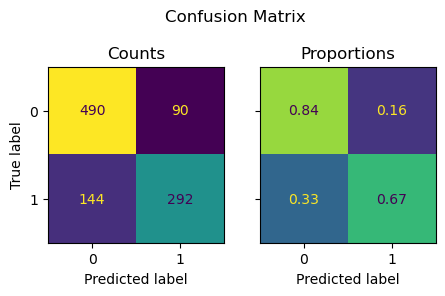

In [9]:
for flavour in ["LSTM", "GRU", "RNN"]:
    
    print(f"====== {flavour} ======")

    model = build_NN(embeddings_layer,flavour=flavour)
    model, history = train_model(model, X_train_pad, y_train, X_val_pad, y_val, epoch=100)
    trained_model[flavour] = model
    performance_history(history, name=flavour, directory_path="./figures/")
    plt.show()
    
    y_pred = model.predict(X_val_pad)
    y_pred = y_pred = np.argmax(y_pred, axis=1)
    print(classification_report(y_val, y_pred))

    cm_plot(y_val, y_pred)
    plt.savefig(f"./figures/{flavour}.confusion_matrix.png")
    plt.show()

32/32 [==============================] - 0s 6ms/step


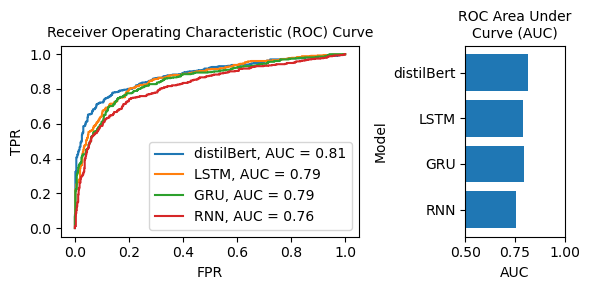

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Calculate ROC AUC scores for each model

model_auc = []

fig, ax = plt.subplots(1,2, figsize=(6, 3), width_ratios=(3,1))

for name in trained_model.keys():
    if name == "distilBert":
        y_pred_proba = trained_model[name].predict(X_val)
    else:
        y_pred_proba = trained_model[name].predict(X_val_pad)
    
    fpr, tpr, _ = roc_curve(y_val,  y_pred_proba[:,1])
    y_pred = np.argmax(y_pred_proba, axis=1)
    auc = roc_auc_score(y_val, y_pred)
    model_auc.append(auc)
    ax[0].plot(fpr,tpr,label=f"{name}, AUC = {auc:.2f}")
    

ax[0].legend(loc='lower right')
ax[0].set_title("Receiver Operating Characteristic (ROC) Curve", size=10)
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

# Plot ROC AUC scores
ax[1].barh(list(trained_model.keys())[::-1],model_auc[::-1])
ax[1].set_xlim(0.5, 1)
ax[1].set_ylabel("Model")
ax[1].set_xlabel("AUC")
ax[1].set_title("ROC Area Under\nCurve (AUC)", size=10)

plt.tight_layout()
plt.savefig("./figures/Model.competition.png")
plt.show()
